# Major Project
One needs to work on Ensemble Learning (modeling) for a given problem. <br>
Problem Statement: For a given dataset (problem) which is the best classification algorithm (as per accuracy)

Pick up a dataset of your choice or the one attached with mail (Preferable) <br>
Ask any two questions on the dataset of your choice and provide answers for the same. 

For instance for the given dataset questions can be as follows.

>Q1) What are the most common emotions/words used by Males and Females? <br>
 Q2) Which gender makes more typos in their tweets?

Take up <b>three classification algorithms </b> of your own choice and build <b>three respective Machine learning models.</b><br> <b>Compare the Accuracy </b>of all three and suggest <b>which ML algorithms suits best </b> for the given problem.
 

NOTE  : For the given dataset <b>"Gender"</b>  will be your dependent variable.

---

Evaluation will be done on following points:

1. Exploratory data analysis (with visualization) and Data Cleaning if required 
2. Questions asked on dataset and answers for the same with brief explanation  
3. Feature Selection and feature Engineering if required depending on the dataset
4. Ensemble Machine learning Modelling (3 Classification Algorithms)
5. Accuracy calculation 
6. Summarised write up at the end 


In [1]:
#Importing libraries

import pandas as pd
import numpy as np

In [2]:
#Reading csv

df=pd.read_csv("Information.csv", encoding = "ISO-8859-1", index_col=0)

# Exploratory data analysis (with visualization) and Data Cleaning if required

### EDA

In [3]:
df.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
_unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 815719226 to 815757985
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                20050 non-null  bool   
 1   _unit_state            20050 non-null  object 
 2   _trusted_judgments     20050 non-null  int64  
 3   _last_judgment_at      20000 non-null  object 
 4   gender                 19953 non-null  object 
 5   gender:confidence      20024 non-null  float64
 6   profile_yn             20050 non-null  object 
 7   profile_yn:confidence  20050 non-null  float64
 8   created                20050 non-null  object 
 9   description            16306 non-null  object 
 10  fav_number             20050 non-null  int64  
 11  gender_gold            50 non-null     object 
 12  link_color             20050 non-null  object 
 13  name                   20050 non-null  object 
 14  profile_yn_gold        50 non-null     obj

In [5]:
df.describe().columns

Index(['_trusted_judgments', 'gender:confidence', 'profile_yn:confidence',
       'fav_number', 'retweet_count', 'tweet_count', 'tweet_id'],
      dtype='object')

##### Correlation Matrix using heatmap

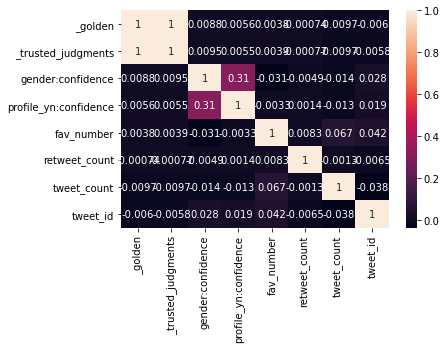

In [6]:
import seaborn as sb
sb.heatmap(df.corr(), annot=True)

###### Visualization of outliers using box-plot

In [7]:
df.describe()

## Outliers that are present in some columns are visualized using boxplot

,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


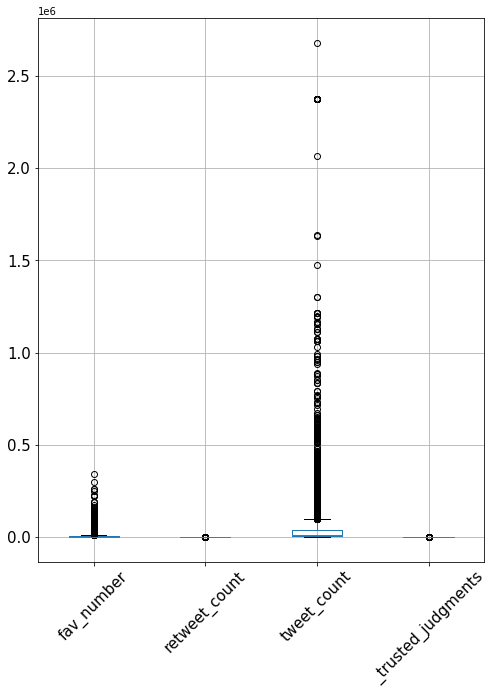

In [8]:
boxplot = df.boxplot(column=["fav_number", "retweet_count",'tweet_count', "_trusted_judgments"], grid=True, rot=45, fontsize=15, figsize=(8,10))

### Normalizing all data between 0 and 1

In [9]:
df["tweet_count"]=((df["tweet_count"]-df["tweet_count"].min())/(df["tweet_count"].max()-df["tweet_count"].min()))*1
df["retweet_count"]=((df["retweet_count"]-df["retweet_count"].min())/(df["retweet_count"].max()-df["retweet_count"].min()))*1

# **Questions asked on dataset and answers for the same with brief explanation**

## Question  - Which gender makes more typos? <br>
#### <b> Answer </b> : From the analysis, it's seen that MALES make more typos than females.

Explanation : <br>
1. Lower the text
2. Remove Stop Words
3. Remove Punctuations
4. Remove new line characters
5. Remove @Users


In [10]:
import nltk
# nltk.download()

In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = list(stopwords.words("english"))

In [12]:
clean_sentence=[]
import re 
import string
user_re = re.compile('@\s*\S*')

for i in range(df.shape[0]):
    current_tweet = str(df['text'].values[i])
    
    # Lower
    current_tweet = current_tweet.lower()     
    
    # Remove punctations
    current_tweet=current_tweet.translate(str.maketrans("","",string.punctuation))
    
    # Remove the new line character
    current_tweet=current_tweet.replace("\n","")

    # Check @ Users
    users = user_re.findall(current_tweet)
    users = [words for segments in users for words in segments.split()]
    
    tokenized_words = word_tokenize(current_tweet)
    clean_text = '';
    for word in tokenized_words:
        if  not(word in stop_words) and not(word in users):
            clean_text += word + ' '
    clean_sentence.append(clean_text)
    
df["text"] = clean_sentence

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# Initializing one-hot vector
cv = CountVectorizer()

male_matrix = cv.fit_transform(list(df[df['gender'] == "male"].text))
freqs_male = zip(cv.get_feature_names(), male_matrix.sum(axis=0).tolist()[0])
res_male= sorted(freqs_male, key=lambda x: -x[1])

female_matrix = cv.fit_transform(list(df[df['gender'] == "female"].text))
freqs_female = zip(cv.get_feature_names(), female_matrix.sum(axis=0).tolist()[0])
res_female= sorted(freqs_female, key=lambda x: -x[1])

female_list = list(res[0] for res in res_female)
male_list = list(res[0] for res in res_male)

#print(res_male)

In [15]:
## use pip install pyspellchecker
from spellchecker import SpellChecker

In [16]:
spell = SpellChecker()
misspelled = spell.unknown(female_list)
print("Total Words written by Female\t: "+ str(len(female_list)))
print("Misspelled Words by Female\t: "+ str(len(misspelled)))
print("Missplelled Ratio\t\t: "+ str(round(len(female_list)/len(misspelled),5)))

print("")
print("=========================")
print("")

spell = SpellChecker()
misspelled = spell.unknown(male_list)
print("Total Words written by Male\t: "+ str(len(male_list)))
print("Misspelled Words by Male\t: "+ str(len(misspelled)))
print("Missplelled Ratio\t\t: "+ str(round(len(male_list)/len(misspelled),5)))

Total Words written by Female	: 18072
Misspelled Words by Female	: 8814
Missplelled Ratio		: 2.05037


Total Words written by Male	: 19384
Misspelled Words by Male	: 9305
Missplelled Ratio		: 2.08318


### 1. Visualization

In [17]:
import matplotlib.pyplot as plt

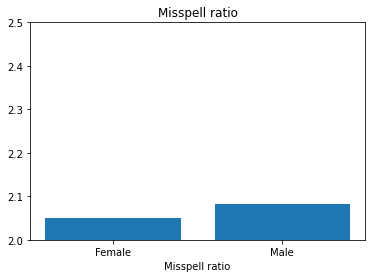

In [18]:
x=["Female", "Male"]
y=[2.05037, 2.08318]

#Setting y limits for better visualization
plt.ylim(2,2.5) 

plt.bar(x,y)


plt.xlabel("Gender")
plt.xlabel("Misspell ratio")
plt.title("Misspell ratio")
plt.show()

### Based on graphs, the gender that it more likely to make typos is - Male

# Question  - What are the most common emotions/words used by Males and Females?

####  <b>Answer </b> :
###### Males: im, get,like,one,dont,time,new <br>  Females: im,	like,get, one, love,day,dont
### *Explanation:* <br>
1. Fetch Columns of interest
2. Clean data of unwanted values
3. Change index to "gender"
4. Subset rows with "males" and later "females" 
5. Initialize count vectorizer to count number of words (limit stopwords and strings such as http...)
6. Compute IDF values. Common words have lower IDF

### *To check common words, we need gender as well as text column*

In [19]:
#Step 1: Fetch Columns of interest
#Columns of interest with target 
df1=df[["text", "gender" ]] 

In [20]:
df1.info()
#its found there are missing values in gender

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 815719226 to 815757985
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20050 non-null  object
 1   gender  19953 non-null  object
dtypes: object(2)
memory usage: 469.9+ KB


In [21]:
#Step 2: Clean data of unwanted values

df1['gender'].replace('brand', np.nan, inplace=True) #replaces with np.nan
df1['gender'].replace('unknown', np.nan, inplace=True) #replaces with np.nan
df1=df1.dropna()

#Label encoding gender
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1["Gender_encoded"]=le.fit_transform(df1['gender']) #male=1, female =0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [22]:
df1.head()

,text,gender,Gender_encoded
_unit_id,,,
815719226,robbie e responds critics win eddie edwards wo...,male,1
815719227,ûïit felt like friends living story themû h...,male,1
815719228,absolutely adore louis starts songs hits hard ...,male,1
815719229,hi jordanspieth looking url use ifttt dont typ...,male,1
815719230,watching neighbours sky catching neighbs xxx ù...,female,0


#### Question 2 Part 1: To find the common words used by MALES

In [23]:
#Step 3: Change index to "gender"

#First, we change the index to "gender" and assign it to another dataframe called "df2"
#New dataframe is assigned because we need df1 again to answer the second part of this question
df2=df1.set_index("gender")

In [24]:
#Step 4. Subset rows with "males" and later "females" 

#We subset only those "male" rows
dfm=df2.loc[["male"],["text"]]
dfm.head()

,text
gender,
male,robbie e responds critics win eddie edwards wo...
male,ûïit felt like friends living story themû h...
male,absolutely adore louis starts songs hits hard ...
male,hi jordanspieth looking url use ifttt dont typ...
male,gala bingo clubs bought å£241m uks largest hig...


In [25]:
#Importing stopwords

from nltk.corpus import stopwords
list_of_stopwords=list(stopwords.words('english')) #To filter out stopwords from 'text'

In [26]:
#Step 5. Initialize count vectorizer to count number of words (limit stopwords and strings such as http...)

from sklearn.feature_extraction.text import TfidfTransformer 
#TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents #For reference
from sklearn.feature_extraction.text import CountVectorizer
#to convert text to a matrix and counts the occurence
cv = CountVectorizer(stop_words=["https", "co", "_ù", 'i',
"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])
listoftext=list(dfm['text'])

#counts every word in listoftext
word_count_vector=cv.fit_transform(listoftext) 

#compute tf-df--> commonly used words have lower score/ weight
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector) 

#store the values in a new dataframe dfm_idf
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 

#sort the values in ascending order, since commonly used words have lessweight
df_idf1=df_idf.sort_values(by=['idf_weights'], ascending= True)
print("Top 25 most commonly used words used by males: ",df_idf1.head(25))

Top 25 most commonly used words used by males:          idf_weights
im         3.823415
get        3.938484
like       3.956946
one        4.218069
dont       4.238436
time       4.365522
new        4.379640
love       4.438193
go         4.458498
people     4.511142
got        4.516562
know       4.555348
good       4.566712
day        4.572442
see        4.656324
think      4.701060
back       4.747891
best       4.754764
make       4.768653
still      4.804244
would      4.811517
need       4.841149
want       4.903184
amp        4.935707
last       4.952374


#### The top 20 most commonly used words by males are listed above

#### Question 2 Part 2: To find the common words used by FEMALES <br> Using similar method 

In [27]:
#We subset only those "female" rows
dff=df2.loc[["female"],["text"]] #We subset only those "female" rows
cv = CountVectorizer(stop_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now""https", "co", "_ù",])

#make a list from dff, of text values
listoftext=list(dff['text'])

#count vectorize the list
word_count_vector=cv.fit_transform(listoftext) 

#tf-idf transform
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector) 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 

#sort the values in ascending order, since commonly used words have lessweight
df_idf2=df_idf.sort_values(by=['idf_weights'], ascending= True)
print("Top 25 most commonly used words used by females: ",df_idf2.head(25))

Top 25 most commonly used words used by females:          idf_weights
im         3.441825
like       3.803659
get        4.004877
one        4.076671
love       4.092984
day        4.164565
dont       4.219025
go         4.253184
time       4.363275
people     4.420940
got        4.496806
new        4.511695
know       4.511695
want       4.589656
best       4.611515
cant       4.628228
back       4.692018
still      4.741108
good       4.741108
see        4.747417
amp        4.766587
make       4.773059
need       4.786132
na         4.799377
ive        4.819579


#### The top 20 most commonly used words by females are listed above

### 1. Data Visualization using plots

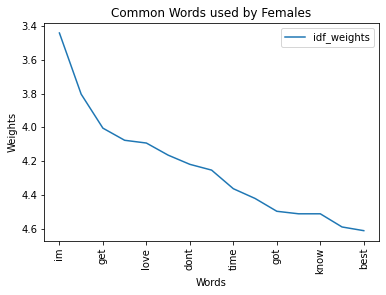

In [28]:
from matplotlib.pyplot import figure


df_idf2.iloc[0:15].plot()
plt.title("Common Words used by Females")
plt.xlabel("Words")
plt.ylabel("Weights")
plt.xticks(rotation=90)


plt.gca().invert_yaxis()



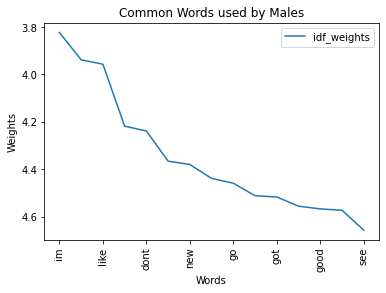

In [29]:
df_idf1.iloc[0:15].plot()
plt.title("Common Words used by Males")
plt.xlabel("Words")
plt.ylabel("Weights")
plt.xticks(rotation=90)

plt.gca().invert_yaxis()


# Ensemble Machine learning Modelling (3 Classification Algorithms)

In [30]:
import pandas as pd
import numpy as np

In [31]:
df=pd.read_csv("Information.csv", encoding = "ISO-8859-1", index_col=0)
df.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
_unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 815719226 to 815757985
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                20050 non-null  bool   
 1   _unit_state            20050 non-null  object 
 2   _trusted_judgments     20050 non-null  int64  
 3   _last_judgment_at      20000 non-null  object 
 4   gender                 19953 non-null  object 
 5   gender:confidence      20024 non-null  float64
 6   profile_yn             20050 non-null  object 
 7   profile_yn:confidence  20050 non-null  float64
 8   created                20050 non-null  object 
 9   description            16306 non-null  object 
 10  fav_number             20050 non-null  int64  
 11  gender_gold            50 non-null     object 
 12  link_color             20050 non-null  object 
 13  name                   20050 non-null  object 
 14  profile_yn_gold        50 non-null     obj

In [33]:
df.columns

Index(['_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at',
       'gender', 'gender:confidence', 'profile_yn', 'profile_yn:confidence',
       'created', 'description', 'fav_number', 'gender_gold', 'link_color',
       'name', 'profile_yn_gold', 'profileimage', 'retweet_count',
       'sidebar_color', 'text', 'tweet_coord', 'tweet_count', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

**Correlation Matrix Using Heatmap**

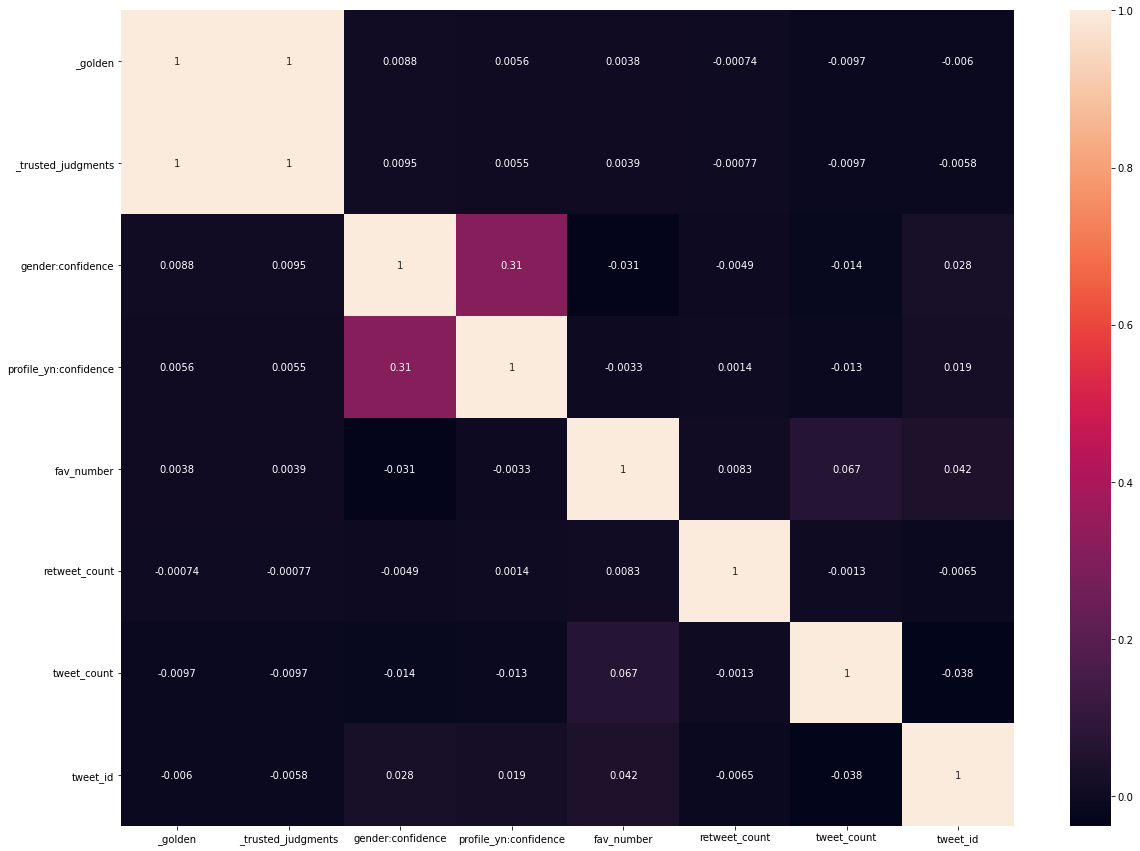

In [34]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sb.heatmap(df.corr(), annot=True)

**Feature engineering**

In [35]:
df = df[['_trusted_judgments',
       'gender', 'fav_number', 'retweet_count', 'tweet_count','_golden','sidebar_color',
         'link_color','profile_yn','_unit_state']]
df.describe()

,_trusted_judgments,fav_number,retweet_count,tweet_count
count,20050.000000,20050.000000,20050.000000,2.005000e+04
mean,3.615711,4382.201646,0.079401,3.892469e+04
std,12.331890,12518.575919,2.649751,1.168371e+05
min,3.000000,0.000000,0.000000,1.000000e+00
25%,3.000000,11.000000,0.000000,2.398000e+03
50%,3.000000,456.000000,0.000000,1.144150e+04
75%,3.000000,3315.500000,0.000000,4.002750e+04
max,274.000000,341621.000000,330.000000,2.680199e+06


In [36]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 815719226 to 815757985
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _trusted_judgments  20050 non-null  int64 
 1   gender              19953 non-null  object
 2   fav_number          20050 non-null  int64 
 3   retweet_count       20050 non-null  int64 
 4   tweet_count         20050 non-null  int64 
 5   _golden             20050 non-null  bool  
 6   sidebar_color       20050 non-null  object
 7   link_color          20050 non-null  object
 8   profile_yn          20050 non-null  object
 9   _unit_state         20050 non-null  object
dtypes: bool(1), int64(4), object(5)
memory usage: 1.5+ MB


In [37]:
df.describe()

,_trusted_judgments,fav_number,retweet_count,tweet_count
count,20050.000000,20050.000000,20050.000000,2.005000e+04
mean,3.615711,4382.201646,0.079401,3.892469e+04
std,12.331890,12518.575919,2.649751,1.168371e+05
min,3.000000,0.000000,0.000000,1.000000e+00
25%,3.000000,11.000000,0.000000,2.398000e+03
50%,3.000000,456.000000,0.000000,1.144150e+04
75%,3.000000,3315.500000,0.000000,4.002750e+04
max,274.000000,341621.000000,330.000000,2.680199e+06


In [38]:
df['gender'].unique() #it's found there are uknown/other genders in the target column

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [39]:
df['gender'].replace('brand', np.nan, inplace=True) #replaces with np.nan
df['gender'].replace('unknown', np.nan, inplace=True) #replaces with np.nan
df=df.dropna() #dropping np.nan values
df.info() #now there is no missing values
df['gender'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12894 entries, 815719226 to 815757985
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _trusted_judgments  12894 non-null  int64 
 1   gender              12894 non-null  object
 2   fav_number          12894 non-null  int64 
 3   retweet_count       12894 non-null  int64 
 4   tweet_count         12894 non-null  int64 
 5   _golden             12894 non-null  bool  
 6   sidebar_color       12894 non-null  object
 7   link_color          12894 non-null  object
 8   profile_yn          12894 non-null  object
 9   _unit_state         12894 non-null  object
dtypes: bool(1), int64(4), object(5)
memory usage: 1019.9+ KB


array(['male', 'female'], dtype=object)

In [40]:
df.info() #now there is no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12894 entries, 815719226 to 815757985
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _trusted_judgments  12894 non-null  int64 
 1   gender              12894 non-null  object
 2   fav_number          12894 non-null  int64 
 3   retweet_count       12894 non-null  int64 
 4   tweet_count         12894 non-null  int64 
 5   _golden             12894 non-null  bool  
 6   sidebar_color       12894 non-null  object
 7   link_color          12894 non-null  object
 8   profile_yn          12894 non-null  object
 9   _unit_state         12894 non-null  object
dtypes: bool(1), int64(4), object(5)
memory usage: 1019.9+ KB


**Label Encoding**

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['_golden'] = le.fit_transform(df['_golden'])
df['sidebar_color'] = le.fit_transform(df['sidebar_color'])
df['link_color'] = le.fit_transform(df['link_color'])
df['profile_yn'] = le.fit_transform(df['profile_yn'])
df['_unit_state'] = le.fit_transform(df['_unit_state'])
df['gender'].replace('female', 1, inplace=True) #replaces with np.nan
df['gender'].replace('male', 0, inplace=True) #replaces with np.nan
df['gender'].unique()

array([0, 1], dtype=int64)

In [42]:
df.head()

,_trusted_judgments,gender,fav_number,retweet_count,tweet_count,_golden,sidebar_color,link_color,profile_yn,_unit_state
_unit_id,,,,,,,,,,
815719226,3,0,0,0,110964,0,418,165,0,0
815719227,3,0,68,0,7471,0,271,51,0,0
815719228,3,0,7696,1,5617,0,271,1417,0,0
815719229,3,0,202,0,1693,0,271,51,0,0
815719230,3,1,37318,0,31462,0,0,701,0,0


In [43]:
df = df.drop_duplicates() #remove duplicates
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12474 entries, 815719226 to 815757985
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   _trusted_judgments  12474 non-null  int64
 1   gender              12474 non-null  int64
 2   fav_number          12474 non-null  int64
 3   retweet_count       12474 non-null  int64
 4   tweet_count         12474 non-null  int64
 5   _golden             12474 non-null  int64
 6   sidebar_color       12474 non-null  int32
 7   link_color          12474 non-null  int32
 8   profile_yn          12474 non-null  int32
 9   _unit_state         12474 non-null  int32
dtypes: int32(4), int64(6)
memory usage: 877.1 KB


**Removing outliers**

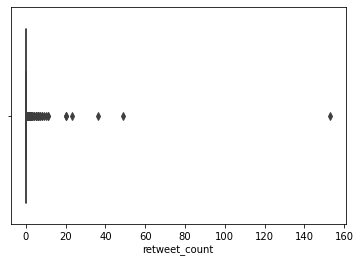

In [44]:
sb.boxplot(df['retweet_count'])

In [45]:
len(df[df['retweet_count']>20])

4

In [46]:
df = df[df['retweet_count']<20] #removing outliers

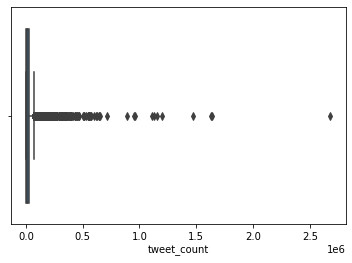

In [47]:
sb.boxplot(df['tweet_count'])

In [48]:
len(df[df['tweet_count']>500000]) #le6 = 10^6 so, 1.5*le6 = 1500000

34

In [49]:
df = df[df['tweet_count']<500000] #removing outliers

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12434 entries, 815719226 to 815757985
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   _trusted_judgments  12434 non-null  int64
 1   gender              12434 non-null  int64
 2   fav_number          12434 non-null  int64
 3   retweet_count       12434 non-null  int64
 4   tweet_count         12434 non-null  int64
 5   _golden             12434 non-null  int64
 6   sidebar_color       12434 non-null  int32
 7   link_color          12434 non-null  int32
 8   profile_yn          12434 non-null  int32
 9   _unit_state         12434 non-null  int32
dtypes: int32(4), int64(6)
memory usage: 874.3 KB


In [51]:
df.columns

Index(['_trusted_judgments', 'gender', 'fav_number', 'retweet_count',
       'tweet_count', '_golden', 'sidebar_color', 'link_color', 'profile_yn',
       '_unit_state'],
      dtype='object')

# Accuracy calculation 

### Classification-1 (Logistic Regression)

In [52]:
X = df[['_trusted_judgments', 'fav_number', 'retweet_count',
       'tweet_count']].values
Y = df[['gender']].values

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [55]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11190, 4), (1244, 4), (11190, 1), (1244, 1))

In [56]:
from sklearn.linear_model import LogisticRegression  

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [59]:
y_pred = lr.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_pred, Y_test)

0.542604501607717

### Classification-2 (Random Forest)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rmc = RandomForestClassifier()

In [64]:
rmc.fit(X_train, Y_train)

<ipython-input-64-da5155fe0e11>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rmc.fit(X_train, Y_train)


RandomForestClassifier()

In [65]:
Y_pred = rmc.predict(X_test)

In [66]:
accuracy_score(Y_pred, Y_test)

0.5120578778135049

### Classification-3 (SVM)

In [67]:
from sklearn.svm import SVC
svc = SVC()

In [68]:
svc.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [69]:
Y_pred = svc.predict(X_test)

In [70]:
accuracy_score(Y_pred, Y_test)

0.5032154340836013

# Summarised write up at the end 

For the two questions baded on the dataset: <br>

Q1) What are the most common emotions/words used by Males and Females? <br> 
Q2) Which gender makes more typos in their tweets?
 
 Answers: 
 >1. (In descending order)
     Common words used by males: get, like, one, time, new <br>
     Common words used by females: like, get, one, love, day <br> 
 >2.  Males make more typos

1)Logistic Regression ~ 56% 

2)Random Forest ~ 53% 

3)SVM ~ 52% 

SO, Logistic Regression is best here!!!